In [1]:
%load_ext autoreload
%autoreload 2

In [6]:
import os, sys
import pickle
import corner
import numpy as np
import matplotlib.pyplot as plt
import h5py
from astropy.table import Table

os.chdir('/scratch/gpfs/jiaxuanl/Data/popsed/')
sys.path.append('/home/jiaxuanl/Research/popsed/')
import popsed
popsed.set_matplotlib(style='JL', usetex=False, dpi=80)

In [3]:
f = h5py.File('./nsa_sedflow/nsa.sedflow.v0.2.hdf5', 'r')

In [7]:
# print data columns
print(f.keys())

<KeysViewHDF5 ['NSAID', 'beta1', 'beta2', 'beta3', 'beta4', 'fburst', 'log_gamma1', 'log_gamma2', 'log_mstar', 'log_sfr_1gyr', 'log_z_mw', 'mag_g', 'mag_i', 'mag_r', 'mag_u', 'mag_z', 'n_dust', 'redshift', 'sedflow', 'sigma_g', 'sigma_i', 'sigma_r', 'sigma_u', 'sigma_z', 'tau_bc', 'tau_ism', 'tburst']>


In [8]:
ids = f['NSAID'][...]

In [9]:
ids

array([     0,      3,      4, ..., 125881, 125910, 125923], dtype=int32)

In [10]:
nsa_cat = Table.read('./reference_catalog/nsa_v1_0_1.fits')

In [12]:
nsa_cat['NSAID'].data

array([     0,      1,      2, ..., 698665, 698666, 698667], dtype=int32)

try to match nsa_cat with Chang's selection

In [18]:
flag = np.in1d(nsa_cat['NSAID'].data, ids)

In [20]:
nsa_cat[flag].write('./reference_catalog/nsa_cleaned.fits')

In [20]:
# for dset in list(f.keys())[1:]:
#     arr = f[dset][:] # adding [:] returns a numpy array
#     print (arr.shape, arr.dtype)

In [21]:
# read stellar mass
logm = f['log_mstar'][...]
redshift = f['redshift'][...]

log_z_mw = f['log_z_mw'][...]

In [39]:
logm.shape

(33884, 10000)

In [57]:
ind = np.random.randint(0, 10000, size=(100))

In [58]:
data = np.vstack([logm[:, ind].ravel(), log_z_mw[:, ind].ravel()]).T

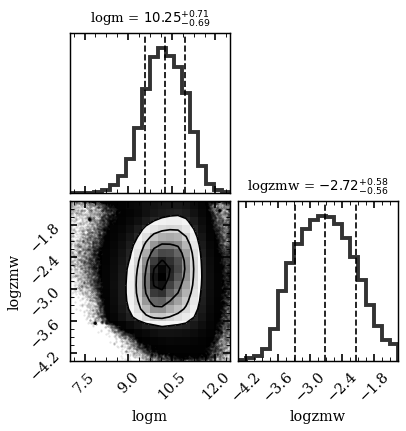

In [60]:
figure = corner.corner(data, 
                       quantiles=[0.16, 0.5, 0.84], 
                       labels=['logm', 'logzmw'],
                       smooth=0.3,
                       show_titles=True, 
                       title_kwargs={"fontsize": 12}, 
                       hist_kwargs={'density': True})

(array([  11198.,   51723.,  364786., 1770961., 5827941., 9744159.,
        9141943., 5597890., 1241461.,  131938.]),
 array([ 7.0000615,  7.550055 ,  8.100049 ,  8.650043 ,  9.200036 ,
         9.75003  , 10.300023 , 10.850018 , 11.400011 , 11.950005 ,
        12.499998 ], dtype=float32),
 <BarContainer object of 10 artists>)

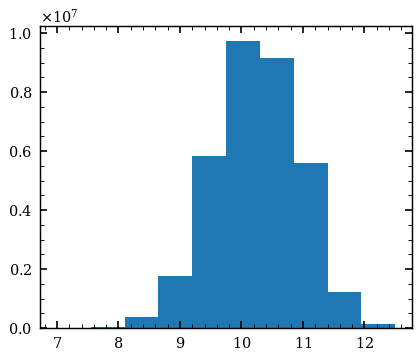

In [46]:
plt.hist()